<a href="https://colab.research.google.com/github/svishak/Covid-19-vaccine-check/blob/main/Heart_disease_using_Logistic%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Installing Kaggle
 ! pip install -q kaggle

In [ ]:
#Uploading kaggle API
from google.colab import files

files.upload()

Saving kaggle.json to kaggle (3).json


{'kaggle.json': b'{"username":"vishaks","key":"2391c1fc0aec20079ac1f890d51e67dc"}'}

In [ ]:
 ! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#Downloading Dataset
!kaggle datasets download -d dileep070/heart-disease-prediction-using-logistic-regression

heart-disease-prediction-using-logistic-regression.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip /content/heart-disease-prediction-using-logistic-regression.zip

Archive:  /content/heart-disease-prediction-using-logistic-regression.zip
replace framingham.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: framingham.csv          


In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Reading CSV
df= pd.read_csv('/content/framingham.csv')

In [ ]:
#Checking for null values.
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
#Dropping education column as it has no relation with heart disease
df.drop('education',axis=1,inplace=True)

In [ ]:
#Since the dataset is huge we can afford to drop NA values
df.dropna(axis=0,how='any',inplace=True)

In [ ]:
#Dataset 
df

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
4232,1,68,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = df.iloc[:,0:14]  #independent columns
y = df.iloc[:,-1]    #target column i.e price range

# apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(15,'Score'))  #print 10 best features/

              Specs       Score
9             sysBP  667.474699
13          glucose  402.071787
1               age  297.287121
8           totChol  251.628483
3        cigsPerDay  185.952614
10            diaBP  143.272443
6      prevalentHyp   82.461330
7          diabetes   31.671664
4            BPMeds   26.080485
0              male   19.191630
11              BMI   17.051372
5   prevalentStroke    8.471237
12        heartRate    3.637635
2     currentSmoker    0.904965


In [ ]:
#Based on feature scores we remove the following column
df.drop(['male','BMI','BPMeds','diabetes','prevalentStroke','heartRate','currentSmoker'],inplace=True,axis=1)

In [ ]:
#Dataset looks like this after removing
df

,age,cigsPerDay,prevalentHyp,totChol,sysBP,diaBP,glucose,TenYearCHD
0,39,0.0,0,195.0,106.0,70.0,77.0,0
1,46,0.0,0,250.0,121.0,81.0,76.0,0
2,48,20.0,0,245.0,127.5,80.0,70.0,0
3,61,30.0,1,225.0,150.0,95.0,103.0,1
4,46,23.0,0,285.0,130.0,84.0,85.0,0
...,...,...,...,...,...,...,...,...
4231,58,0.0,1,187.0,141.0,81.0,81.0,0
4232,68,0.0,1,176.0,168.0,97.0,79.0,1
4233,50,1.0,1,313.0,179.0,92.0,86.0,1
4234,51,43.0,0,207.0,126.5,80.0,68.0,0


In [ ]:
#Here our Y is TenYearCHD our X is everything but Y
X=df.drop(['TenYearCHD'],axis=1)
y=df['TenYearCHD']

In [ ]:
y.shape

(3749,)

In [ ]:
#Splitting dataset into Test and Training
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
#Importing and instantiating Logistic regression.
from sklearn.linear_model import LogisticRegression
LR= LogisticRegression()

In [ ]:
#Fitting the model
LR.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predictions= LR.predict(x_test)

In [ ]:
#Confusion matrix.
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
cm

array([[781,   6],
       [148,   3]])

In [ ]:
print(LR.score(x_train,y_train))

0.8545001778726432


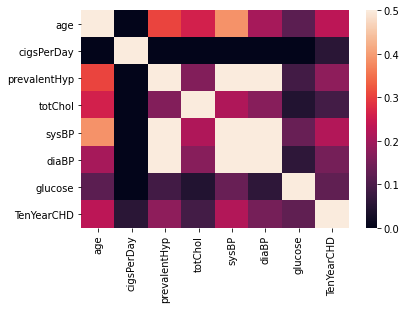

In [ ]:
#Correlation matrix,our point of interest is the last column.
df_corr = df.corr()
sns.heatmap(df_corr,cmap='rocket',vmin=0, vmax=0.5)